In [4]:
# % pylab inline
import os
import random

import pandas as pd
# from scipy.misc import imread
from matplotlib.pyplot import imread

In [6]:
root_dir = os.path.abspath('.')
data_dir = 'data'

train = pd.read_csv(os.path.join(data_dir, 'train.csv'))
test = pd.read_csv(os.path.join(data_dir, 'test.csv'))

Age:  OLD


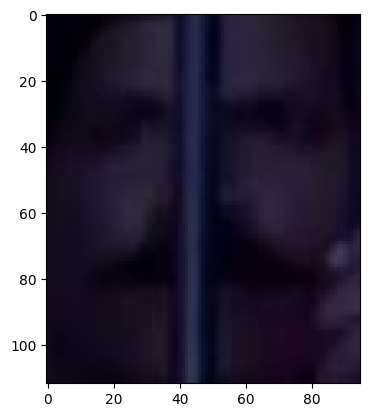

In [8]:
import matplotlib.pyplot as plt

i = random.choice(train.index)

img_name = train.ID[i]
img = imread(os.path.join(data_dir, 'Train', img_name))

print('Age: ', train.Class[i])
plt.imshow(img)

In [10]:
# We can do this by simply resizing the image. Let us load all the images and resize them into a single numpy array

# from scipy.misc import imresize
import numpy as np
import cv2

temp = []
for img_name in train.ID:
    img_path = os.path.join(data_dir, 'Train', img_name)
    img = imread(img_path)
    img = cv2.resize(img, (32, 32))
    img = img.astype('float32') # this will help us in later stage
    temp.append(img)

train_x = np.stack(temp)

In [11]:
# And similarly for test images

temp = []
for img_name in test.ID:
    img_path = os.path.join(data_dir, 'Test', img_name)
    img = imread(img_path)
    img = cv2.resize(img, (32, 32))
    temp.append(img.astype('float32'))

test_x = np.stack(temp)

In [12]:
# Normalizing the images will make our train faster.

train_x = train_x / 255.
test_x = test_x / 255.

In [13]:
train.Class.value_counts(normalize=True)

Class
MIDDLE    0.542751
YOUNG     0.336883
OLD       0.120366
Name: proportion, dtype: float64

## Building the Model

In [14]:
# Building the Model

import keras
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
train_y = lb.fit_transform(train.Class)
train_y = keras.utils.np_utils.to_categorical(train_y)

AttributeError: module 'keras.utils' has no attribute 'np_utils'